In [156]:
from typing import TypedDict
from langgraph.graph import StateGraph, END, START

In [157]:
class AgentState(TypedDict):
    number1:int
    operation:str
    number2:int
    finalNumber:int

In [158]:
def adder(state:AgentState) -> AgentState:
    """This node adds two numbers"""
    state['finalNumber'] = state['number1'] + state['number2']
    return state
def subtractor(state:AgentState) -> AgentState:
    """This node subtracts two numbers"""
    state['finalNumber'] = state['number1'] - state['number2']
    return state

def decide_next_node(state:AgentState) -> AgentState:
    """This node decides the next node to execute"""
    if state['operation'] == '+':
        return 'addition_operation' #we return the name of the edge to be taken
    elif state['operation'] == '-':
        return 'substraction_operation'

    
    

In [159]:
graph = StateGraph(AgentState)

#in this case we are not updating the state of the node
# we are only using this node as a conditional node checker
#therefore we can pass the state as it is (that is the what the lambda function is doing)
graph.add_node('router', lambda state: state)

graph.add_node("add_node", adder)
graph.add_node("substract_node", subtractor)

graph.add_edge(START, 'router')
graph.add_conditional_edges('router', decide_next_node,
{   
    #Edge : Nodes
    "addition_operation":"add_node",
    "substraction_operation":"substract_node"
})

graph.add_edge('add_node',END)
graph.add_edge('substract_node',END)

app = graph.compile()



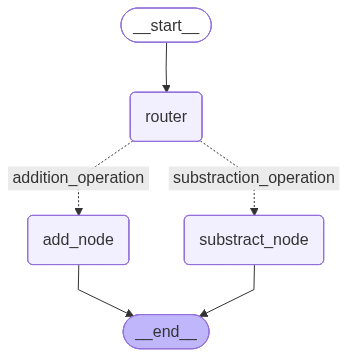

In [160]:
from IPython.display import Image, display

display(Image(app.get_graph().draw_mermaid_png()))

In [161]:
initial_state = AgentState(number1=10,operation='-',number2=5)
result = app.invoke(initial_state) 
print(result['finalNumber'])

5


## Excersise


In [162]:
class AgentState2(TypedDict):
    number1:int
    operation:str
    number2:int
    finalNumber:int
    number3:int
    operation2:str
    number4:int
    finalNumber2:int

In [163]:
def adder(state:AgentState2) -> AgentState2:
    """This node adds two numbers"""
    state['finalNumber'] = state['number1'] + state['number2']
    return state
def subtractor(state:AgentState2) -> AgentState2:
    """This node subtracts two numbers"""
    state['finalNumber'] = state['number1'] - state['number2']
    return state

def decide_next_node(state:AgentState2) -> AgentState2:
    """This node decides the next node to execute"""
    if state['operation'] == '+':
        return 'addition_operation' #we return the name of the edge to be taken
    elif state['operation'] == '-':
        return 'substraction_operation'


In [164]:
def adder2(state:AgentState2) -> AgentState2:
    """This node adds two numbers"""
    state['finalNumber2'] = state['number3'] + state['number4']
    return state
def subtractor2(state:AgentState2) -> AgentState2:
    """This node subtracts two numbers"""
    state['finalNumber2'] = state['number3'] - state['number4']
    return state

def decide_next_node2(state:AgentState2) -> AgentState2:
    """This node decides the next node to execute"""
    if state['operation2'] == '+':
        return 'addition_operation2' #we return the name of the edge to be taken
    elif state['operation2'] == '-':
        return 'substraction_operation2'


In [165]:
graph = StateGraph(AgentState2)
graph.add_node("router1",lambda state:state)
graph.add_node("router2",lambda state:state)

graph.add_node("add1",adder)
graph.add_node("sub1",subtractor)
graph.add_node("add2",adder2)
graph.add_node("sub2",subtractor2)

graph.add_conditional_edges("router1",decide_next_node,
{
    "addition_operation":"add1",
    "substraction_operation":"sub1"

})


graph.add_edge(START,"router1")
graph.add_edge("add1","router2")
graph.add_edge("sub1","router2")
graph.add_conditional_edges("router2",decide_next_node2,
{
    "addition_operation2":"add2",
    "substraction_operation2":"sub2"

})
graph.add_edge("add2",END)
graph.add_edge("sub2",END)

app = graph.compile()



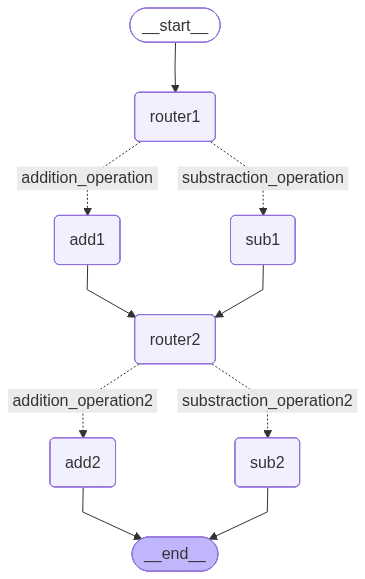

In [166]:
from IPython.display import Image, display

display(Image(app.get_graph().draw_mermaid_png()))

In [167]:
initial_state = AgentState2(number1 = 10, operation="-", number2 = 5, number3 = 7, number4=2, operation2="+", finalNumber= 0, finalNumber2 = 0)

In [168]:
print(app.invoke(initial_state))

{'number1': 10, 'operation': '-', 'number2': 5, 'finalNumber': 5, 'number3': 7, 'operation2': '+', 'number4': 2, 'finalNumber2': 9}
